In [1]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('D:/Đồ án 2 Thầy Trị/Đồ Án 2/weatherbit_hanoi_2024.xlsx')

In [3]:
data

,Mốc thời gian,Mức độ mây che phủ,Điểm sương,Bức xạ khuếch tán ngang(DHI),Bức xạ trực tiếp bình thường(DNI),Bức xạ mặt trời toàn phần ngang(GHI),max_dhi,max_dni,max_ghi,Bức xạ mặt trời tổng,...,Tốc độ gió giật,Tốc độ gió trung bình,Lượng mưa ghi nhận,Lượng mưa từ nguồn vệ tinh GPM,Áp suất không khí,Độ ẩm tương đối,Áp suất mặt biển chuẩn,Trạng thái cập nhật dữ liệu,Lượng tuyết rơi,Độ sâu tuyết tích tụ
0,2023-12-31,79,18.9,40,329,207,116,911,764,78,...,3.6,0.9,0.0,0.0,1016,82,1017,final,0,0
1,2024-01-01,59,18.1,40,329,207,116,912,764,189,...,7.6,1.6,0.0,0.0,1015,79,1017,final,0,0
2,2024-01-02,77,19.6,40,329,208,116,912,765,149,...,7.4,1.4,0.0,0.0,1015,81,1016,final,0,0
3,2024-01-03,80,15.4,40,329,208,116,912,767,50,...,10.4,1.8,0.0,0.0,1018,79,1019,final,0,0
4,2024-01-04,100,14.0,40,330,209,116,913,768,69,...,6.0,1.4,0.0,0.0,1018,71,1019,final,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2024-12-26,92,14.3,40,327,206,116,910,759,111,...,6.4,1.4,0.0,0.0,1021,66,1021,final,0,0
361,2024-12-27,100,13.6,40,328,206,116,910,760,52,...,7.6,2.2,0.0,0.0,1023,73,1024,final,0,0
362,2024-12-28,65,11.0,40,328,206,116,910,761,174,...,8.0,2.2,0.0,0.0,1025,65,1026,final,0,0
363,2024-12-29,39,11.8,40,328,207,116,911,762,207,...,6.8,1.7,0.0,0.0,1020,68,1021,final,0,0


In [4]:
dscr = data.describe()
dscr

,Mốc thời gian,Mức độ mây che phủ,Điểm sương,Bức xạ khuếch tán ngang(DHI),Bức xạ trực tiếp bình thường(DNI),Bức xạ mặt trời toàn phần ngang(GHI),max_dhi,max_dni,max_ghi,Bức xạ mặt trời tổng,...,Hướng gió hiện tại,Tốc độ gió giật,Tốc độ gió trung bình,Lượng mưa ghi nhận,Lượng mưa từ nguồn vệ tinh GPM,Áp suất không khí,Độ ẩm tương đối,Áp suất mặt biển chuẩn,Lượng tuyết rơi,Độ sâu tuyết tích tụ
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.0
mean,2024-06-30 22:05:35.342465792,70.284932,21.291233,47.484932,378.539726,289.800000,123.542466,935.021918,955.005479,146.030137,...,180.342466,7.273699,1.576164,6.732603,6.732603,1009.608219,79.364384,1010.509589,0.0,0.0
min,2023-12-31 00:00:00,0.000000,3.300000,40.000000,326.000000,205.000000,115.000000,909.000000,757.000000,21.000000,...,50.000000,2.800000,0.600000,0.000000,0.000000,992.000000,52.000000,993.000000,0.0,0.0
25%,2024-04-01 00:00:00,56.000000,18.200000,43.000000,348.000000,241.000000,120.000000,928.000000,854.000000,75.000000,...,140.000000,6.000000,1.200000,0.000000,0.000000,1004.000000,75.000000,1004.000000,0.0,0.0
50%,2024-07-01 00:00:00,75.000000,23.300000,48.000000,382.000000,304.000000,126.000000,937.000000,1007.000000,120.000000,...,161.000000,7.200000,1.500000,0.500000,0.500000,1009.000000,81.000000,1010.000000,0.0,0.0
75%,2024-09-30 00:00:00,90.000000,25.800000,52.000000,412.000000,339.000000,126.000000,942.000000,1050.000000,211.000000,...,216.000000,8.400000,1.800000,6.500000,6.500000,1015.000000,85.000000,1016.000000,0.0,0.0
max,2024-12-30 00:00:00,100.000000,28.300000,53.000000,419.000000,346.000000,128.000000,956.000000,1062.000000,337.000000,...,348.000000,25.600000,5.600000,114.500000,114.500000,1028.000000,95.000000,1029.000000,0.0,0.0
std,NaN,24.795336,5.539457,4.778951,32.745551,50.541257,4.083803,13.226869,109.123732,84.634519,...,62.289738,2.019144,0.511147,14.651250,14.651250,7.099949,8.757185,7.123560,0.0,0.0


In [5]:
# Xóa bỏ dữ liệu dư thừa
xoa_dulieu = data.drop(columns=['Lượng tuyết rơi',
                                'Độ sâu tuyết tích tụ',
                                'Trạng thái cập nhật dữ liệu'])
data = xoa_dulieu
data

,Mốc thời gian,Mức độ mây che phủ,Điểm sương,Bức xạ khuếch tán ngang(DHI),Bức xạ trực tiếp bình thường(DNI),Bức xạ mặt trời toàn phần ngang(GHI),max_dhi,max_dni,max_ghi,Bức xạ mặt trời tổng,...,Hướng gió tại thời điểm gió mạnh nhất,Thời điểm có hướng gió mạnh nhất,Hướng gió hiện tại,Tốc độ gió giật,Tốc độ gió trung bình,Lượng mưa ghi nhận,Lượng mưa từ nguồn vệ tinh GPM,Áp suất không khí,Độ ẩm tương đối,Áp suất mặt biển chuẩn
0,2023-12-31,79,18.9,40,329,207,116,911,764,78,...,155,1704006000,155,3.6,0.9,0.0,0.0,1016,82,1017
1,2024-01-01,59,18.1,40,329,207,116,912,764,189,...,135,1704042000,135,7.6,1.6,0.0,0.0,1015,79,1017
2,2024-01-02,77,19.6,40,329,208,116,912,765,149,...,135,1704196800,135,7.4,1.4,0.0,0.0,1015,81,1016
3,2024-01-03,80,15.4,40,329,208,116,912,767,50,...,186,1704261600,186,10.4,1.8,0.0,0.0,1018,79,1019
4,2024-01-04,100,14.0,40,330,209,116,913,768,69,...,197,1704337200,197,6.0,1.4,0.0,0.0,1018,71,1019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2024-12-26,92,14.3,40,327,206,116,910,759,111,...,233,1735185600,233,6.4,1.4,0.0,0.0,1021,66,1021
361,2024-12-27,100,13.6,40,328,206,116,910,760,52,...,212,1735254000,212,7.6,2.2,0.0,0.0,1023,73,1024
362,2024-12-28,65,11.0,40,328,206,116,910,761,174,...,230,1735365600,230,8.0,2.2,0.0,0.0,1025,65,1026
363,2024-12-29,39,11.8,40,328,207,116,911,762,207,...,136,1735452000,136,6.8,1.7,0.0,0.0,1020,68,1021


In [6]:
typecheck = pd.DataFrame(data)
print(typecheck.dtypes)

Mốc thời gian                                           datetime64[ns]
Mức độ mây che phủ                                               int64
Điểm sương                                                     float64
Bức xạ khuếch tán ngang(DHI)                                     int64
Bức xạ trực tiếp bình thường(DNI)                                int64
Bức xạ mặt trời toàn phần ngang(GHI)                             int64
max_dhi                                                          int64
max_dni                                                          int64
max_ghi                                                          int64
Bức xạ mặt trời tổng                                             int64
Giá trị dự đoán bức xạ khuếch tán ngang(DHI)                     int64
Giá trị dự đoán bức xạ trực tiếp bình thường(DNI)                int64
Giá trị dự đoán bức xạ mặt trời toàn phần ngang(GHI)             int64
Giá trị dự đoán bức xạ mặt trời tổng                             int64
Nhiệt 

In [7]:
missing_value = data.isnull().sum()
print(missing_value)
print("Tổng số giá trị thiếu trong dataframe là", missing_value.sum())

Mốc thời gian                                           0
Mức độ mây che phủ                                      0
Điểm sương                                              0
Bức xạ khuếch tán ngang(DHI)                            0
Bức xạ trực tiếp bình thường(DNI)                       0
Bức xạ mặt trời toàn phần ngang(GHI)                    0
max_dhi                                                 0
max_dni                                                 0
max_ghi                                                 0
Bức xạ mặt trời tổng                                    0
Giá trị dự đoán bức xạ khuếch tán ngang(DHI)            0
Giá trị dự đoán bức xạ trực tiếp bình thường(DNI)       0
Giá trị dự đoán bức xạ mặt trời toàn phần ngang(GHI)    0
Giá trị dự đoán bức xạ mặt trời tổng                    0
Nhiệt độ cao nhất                                       0
Thời điểm nhiệt độ cao nhất                             0
Nhiệt độ thấp nhất                                      0
Thời điểm nhiệ

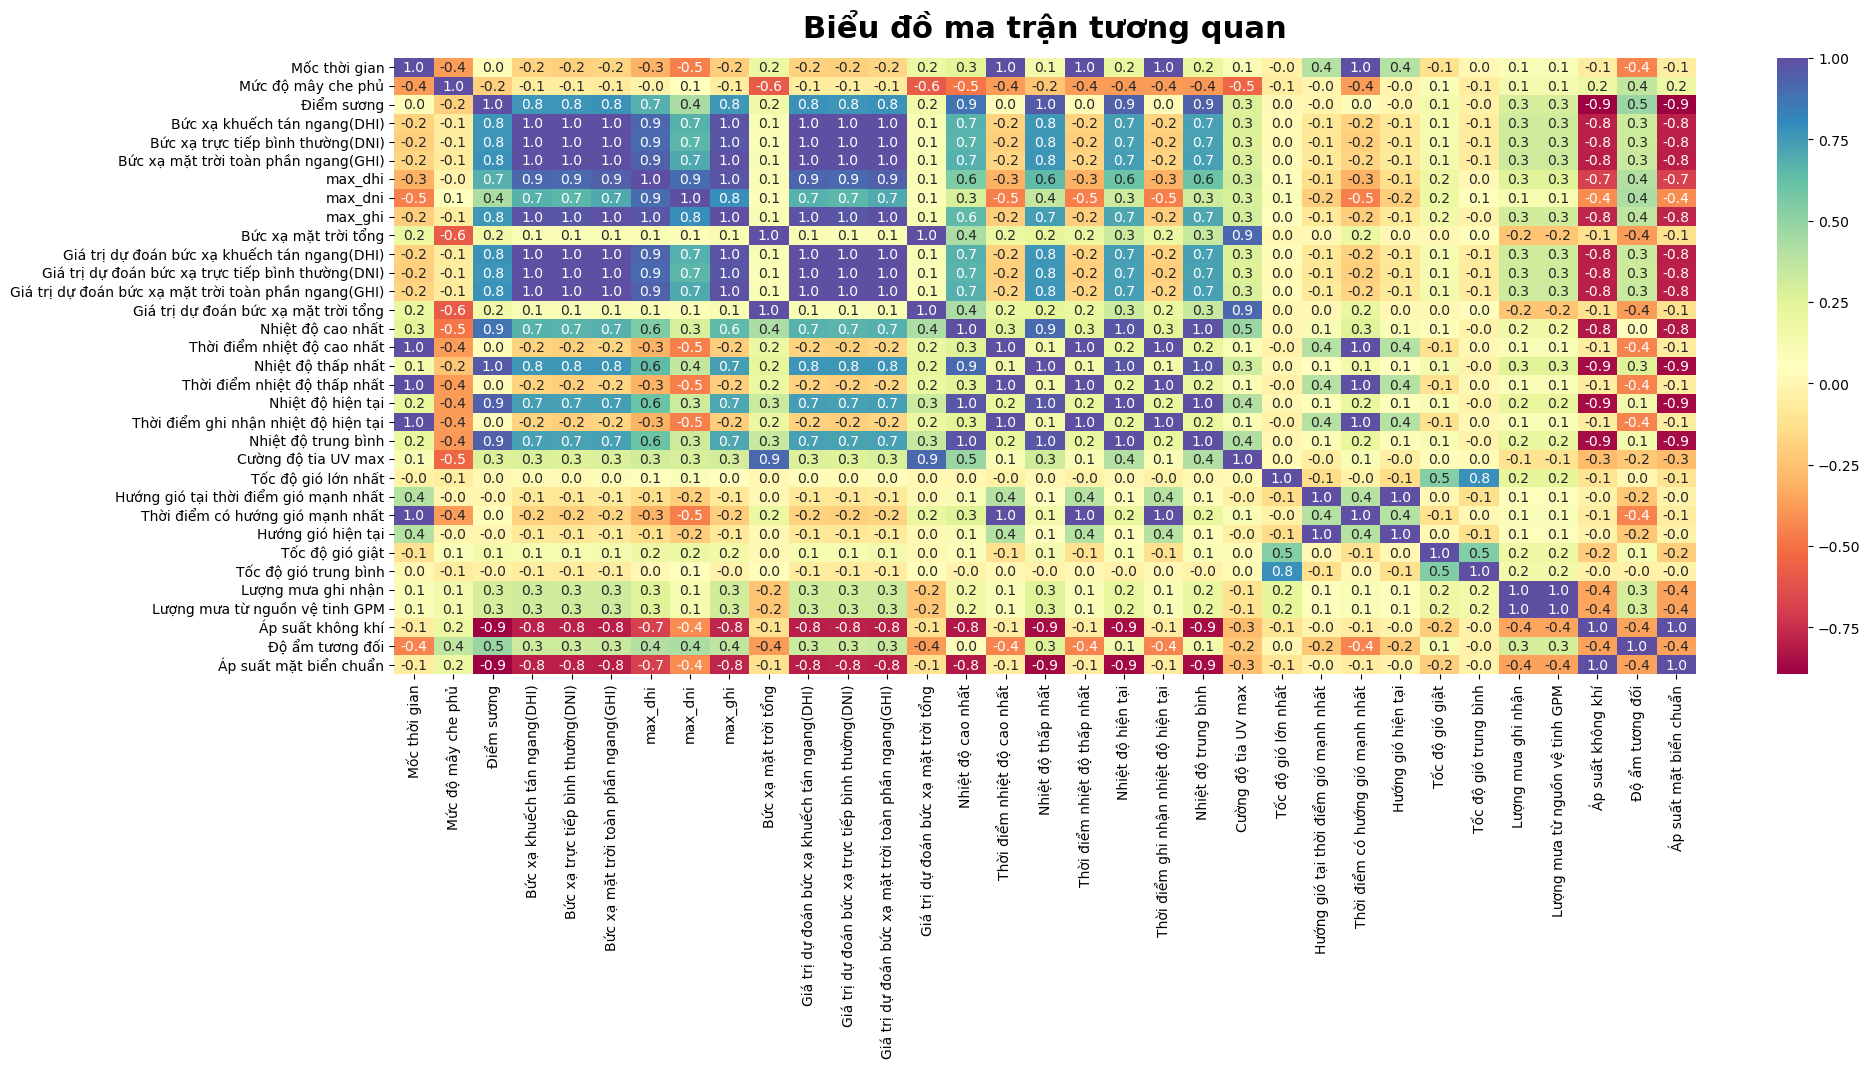

In [8]:
corre = data.corr()
plt.figure(figsize=(21, 8))
sns.heatmap(corre, annot=True, cmap='Spectral',
fmt='.1f')
plt.title('Biểu đồ ma trận tương quan', fontsize='22',
fontweight='bold', pad=15)
plt.show()

MÔ HÌNH HỒI QUY TUYẾN TÍNH DỰ ĐOÁN NHIỆT ĐỘ, LƯỢNG MƯA, 
ĐỘ ẨM TƯƠNG ĐỐI, HƯỚNG GIÓ, TỐC ĐỘ GIÓ GIẬT, CƯỜNG ĐỘ TIA UV MAX CHO NGÀY TIẾP THEO

In [9]:
# chuyển đổi cột "Mốc thời gian" sang kiểu datetime
data["Mốc thời gian"] = pd.to_datetime(data["Mốc thời gian"], dayfirst=True, errors='coerce')

# trích xuất biến độc lập
features = [
    "Nhiệt độ trung bình", "Điểm sương", "Độ ẩm tương đối", "Mức độ mây che phủ", "Tốc độ gió trung bình",
    "Tốc độ gió giật", "Hướng gió hiện tại", "Áp suất không khí", "Áp suất mặt biển chuẩn",
    "Bức xạ mặt trời toàn phần ngang(GHI)", "Lượng mưa ghi nhận", "Thời điểm ghi nhận nhiệt độ hiện tại"
]

# xác định biến phụ thuộc
targets = [
    "Nhiệt độ hiện tại", "Lượng mưa ghi nhận", "Độ ẩm tương đối", 
    "Hướng gió hiện tại", "Tốc độ gió giật", "Cường độ tia UV max"
]

# tạo tập dữ liệu dịch chuyển để dự đoán ngày tiếp theo
data_features = data[features]
data_targets = data[targets].shift(-1)
data_model = pd.concat([data_features, data_targets], axis=1).dropna()

X = data_model[features]
y = data_model[targets]

# chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)

# chia tập train test 8/2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# dự đoán trên tập test
y_pred = model.predict(X_test)

# lấy ngày
last_day = data["Mốc thời gian"].max()
if isinstance(last_day, str):
    last_day = pd.to_datetime(last_day, dayfirst=True, errors='coerce')

prediction_date = last_day + pd.Timedelta(days=1)
prediction_date_str = prediction_date.strftime("%d/%m/%Y")

output_predict = y_pred[0]

# in kết quả dự báo
output_text = "\n📅 Dự báo thời tiết ngày 31/12/2024:\n" + "\n".join([
    f"Nhiệt độ     : {output_predict[0]:.1f}°C",
    f"Lượng mưa    : {abs(output_predict[1]):.1f}mm",
    f"Độ ẩm        : {output_predict[2]:.1f}%",
    f"Hướng gió    : {output_predict[3]:.1f}°",
    f"Tốc độ gió   : {output_predict[4]:.1f}m/s",
    f"Cường độ UV  : {output_predict[5]:.1f}"])

In [10]:
print(output_text)


📅 Dự báo thời tiết ngày 31/12/2024:
Nhiệt độ     : 28.3°C
Lượng mưa    : 0.0mm
Độ ẩm        : 9.0%
Hướng gió    : 79.0°
Tốc độ gió   : 83.0m/s
Cường độ UV  : 155.0


PHÂN LOẠI KIỂU THỜI TIẾT DỰA TRÊN CÁC YẾU TỐ MÔI TRƯỜNG

In [11]:

f_name = ['Mức độ mây che phủ','Điểm sương', 'Bức xạ mặt trời tổng', 'Nhiệt độ cao nhất', 'Nhiệt độ thấp nhất',
                 'Nhiệt độ trung bình', 'Cường độ tia UV max', 'Tốc độ gió lớn nhất', 'Tốc độ gió giật', 'Tốc độ gió trung bình',
                 'Lượng mưa ghi nhận', 'Lượng mưa từ nguồn vệ tinh GPM', 'Áp suất không khí', 'Độ ẩm tương đối']

#trích dữ liệu từ các cột và loại dòng thiếu
f_data = data[f_name].dropna()
Scaled = StandardScaler().fit_transform(f_data)

In [12]:
#giảm chiều dữ liệu từ 14 chiều xuống còn 3 chiều
pca = PCA(n_components=3)
pca_data = pca.fit_transform(Scaled)

dataframe_pca = pd.DataFrame(pca_data, columns=['Nhãn 1','Nhãn 2','Nhãn 3'], index=f_data.index)

In [13]:
#chọn số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters_pca = kmeans.fit_predict(pca_data)
dataframe_pca['cluster'] = clusters_pca

clusters_labels = { 0: 'Nắng nóng khô',
                    1: 'Mưa ẩm',
                    2: 'Trời mát'}
dataframe_pca['label'] = dataframe_pca['cluster'].map(clusters_labels)

# Tâm của các cụm (centroids)
centroids = kmeans.cluster_centers_
print("tâm",centroids)

tâm [[ 1.50017971  1.41716372  0.430208  ]
 [-2.77952361 -0.12635214  0.01151917]
 [ 1.31123252 -1.50616045 -0.51199909]]


c:\Users\THINH\ANACONDA3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\THINH\ANACONDA3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\THINH\ANACONDA3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\THINH\ANACONDA3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\THINH\ANACONDA3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [25]:
f_data_labeled = f_data.copy()
f_data_labeled['label'] = dataframe_pca['label']
f_data_labeled.iloc[100:110]

,Mức độ mây che phủ,Điểm sương,Bức xạ mặt trời tổng,Nhiệt độ cao nhất,Nhiệt độ thấp nhất,Nhiệt độ trung bình,Cường độ tia UV max,Tốc độ gió lớn nhất,Tốc độ gió giật,Tốc độ gió trung bình,Lượng mưa ghi nhận,Lượng mưa từ nguồn vệ tinh GPM,Áp suất không khí,Độ ẩm tương đối,label
100,97,22.1,71,25.0,21.9,23.45,3.6,2.0,6.4,1.2,0.3,0.3,1013,91,Mưa ẩm
101,84,23.5,101,29.7,23.5,26.60,4.0,2.4,8.8,1.6,0.0,0.0,1012,87,Trời mát
102,90,23.5,116,30.5,24.9,27.70,3.6,2.9,9.6,1.9,0.0,0.0,1010,82,Trời mát
103,96,23.9,121,30.3,25.8,28.05,3.6,3.9,10.0,2.5,0.0,0.0,1007,80,Trời mát
104,100,24.4,109,31.0,26.0,28.50,3.7,2.9,8.0,2.0,0.0,0.0,1007,82,Trời mát
105,91,24.5,98,29.7,26.1,27.90,3.7,3.0,10.0,1.9,9.5,9.5,1008,85,Trời mát
106,54,23.2,271,32.0,25.0,28.50,9.7,3.0,10.8,2.0,3.3,3.3,1007,77,Nắng nóng khô
107,85,24.9,141,30.3,26.3,28.30,4.5,2.8,8.0,1.7,10.3,10.3,1006,85,Trời mát
108,56,24.5,256,32.0,24.7,28.35,10.5,3.0,8.8,1.8,9.5,9.5,1004,84,Nắng nóng khô
109,69,25.3,244,33.6,26.1,29.85,9.1,3.0,8.0,2.4,0.0,0.0,1001,82,Nắng nóng khô


In [19]:
dataframe_pca['label'].value_counts().reset_index().rename(columns={'index':'label','label':'Nhãn'})

,Nhãn,count
0,Nắng nóng khô,130
1,Mưa ẩm,123
2,Trời mát,112


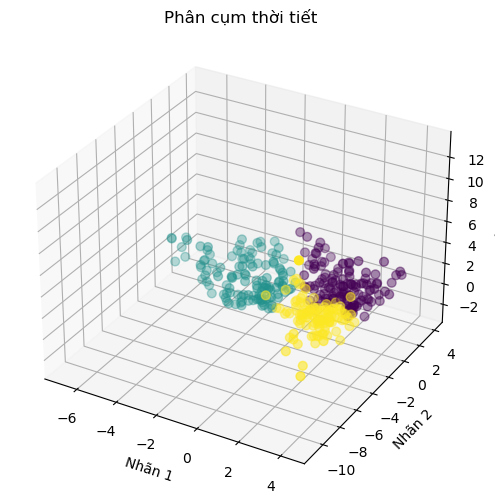

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    dataframe_pca['Nhãn 1'], 
    dataframe_pca['Nhãn 2'],
    dataframe_pca['Nhãn 3'],  c=dataframe_pca['cluster'],  cmap='viridis', s=40)

ax.set_xlabel('Nhãn 1')
ax.set_ylabel('Nhãn 2')
ax.set_zlabel('Nhãn 3')
ax.set_title('Phân cụm thời tiết')
plt.show()


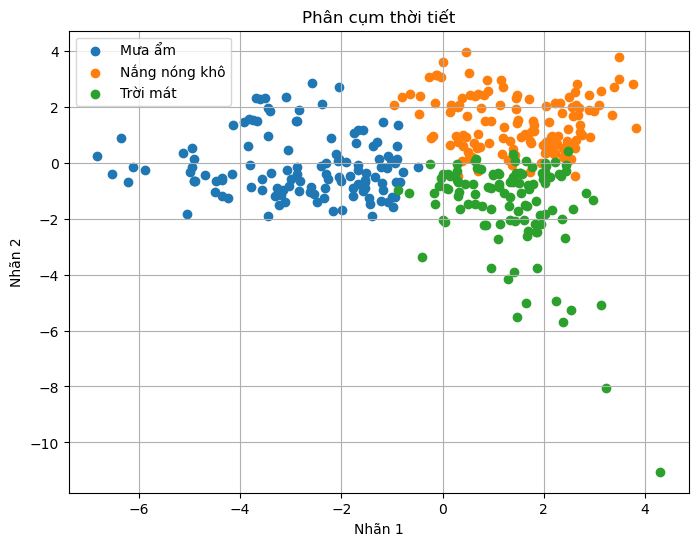

In [ ]:
plt.figure(figsize=(8,6))
for label in dataframe_pca['label'].unique():
    subset = dataframe_pca[dataframe_pca['label'] == label]
    plt.scatter(subset['Nhãn 1'], subset['Nhãn 2'], label=label)

plt.xlabel('Nhãn 1')
plt.ylabel('Nhãn 2')
plt.legend()
plt.title('Phân cụm thời tiết')
plt.grid(True)
plt.show()


SARIMA

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Example sales data (monthly)
sales_data = [250, 270, 300, 320, 310, 280, 260, 275, 290, 310, 340, 360]

# Fit ARIMA model
model = ARIMA(sales_data, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)
print(forecast)

[369.93278696 374.41348197 376.43473017 377.34651824 377.7578272
 377.94336929]
